# Условие задачи

**Дано:**
- цепочка молекул, расположенных в узлах кристаллической решетки, длины $L$
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать среднюю энергию $<E>$ для указанной цепочки молекул при:
    - длине цепочки $L \in [2, 3, ..., 31]$
    - температурах $kT \in [1, 1.1, ..., 5.0]$
- вывести время расчета каждой итерации по $L$ или по $kT$
- отобразить цветовую карту:
    - ось абсцисс - $L$,
    - ось ординат - $kT$,
    - цветом отобразить нормированное значение средней энергии $\langle E \rangle / L$,
    - подписать оси,
    - отобразить цветовую шкалу (colorbar),
    - засечки должны соответствовать значениям $L, kT$.
    

**Описание:**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы. 

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым). 
$$H(\sigma)= E_0(\sigma)+E_1(\sigma) $$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что озачает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений соседних спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{\langle i,j\rangle} J_{ij}\sigma _i\sigma _j $$

Вероятность находиться в состоянии $\sigma$
$$P_{\beta}(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z_{\beta}},$$
	где $Z_{\beta} = \sum\limits_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k_bT}-$ обратная температура, $k_b-$ константа Больцмана.
	
Средняя энергия системы $$\langle E \rangle = \frac{1}{Z_\beta}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$

**Проверка корректности результатов:**

Средняя энергия для $L=4$ и температурах $kT \in [1, 1.1, ..., 5.0]$

```
[-0.90041268 -0.86237592 -0.8217837  -0.78036351 -0.73945083 -0.69997326
 -0.66250687 -0.62735685 -0.59463601 -0.56432951 -0.5363436  -0.51054017
 -0.4867599  -0.46483724 -0.44460959 -0.42592256 -0.40863272 -0.39260867
 -0.37773122 -0.36389287 -0.35099709 -0.33895741 -0.32769644 -0.31714496
 -0.30724104 -0.29792925 -0.28915987 -0.28088833 -0.27307453 -0.26568238
 -0.25867936 -0.25203607 -0.2457259  -0.23972475 -0.23401071 -0.22856386
 -0.22336604 -0.21840066 -0.21365255 -0.20910782]
```

**Материалы:**
- 
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)

In [1]:
import numpy as np
from numba import njit, prange
from numba.typed import List
import itertools
import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns;

In [2]:
@njit(boundscheck=False)
def SystemEnergy(system_sigma, L):
    """
    Computes the interaction energy of molecules with given spins, provided by an array of length L.
    Length L should be at least 2 to be used in computing.
    
    Parameters
    ----------
    system_sigma: array_like.
    Array containing spins represented as +1 or -1 with length L.

    L: int.
    Represents the number of molecules in estimation and responsible for the length of system_sigma array.
    
    Returns
    -------
    Energy: int.
    Calculated value of the energy of molecules at given spins.
    """
    J = 1
    Energy = 0
    if L != 1:
        for i in prange(L):
            Energy -= J * system_sigma[i] * system_sigma[(i+1)%L]
    return Energy

In [3]:
@njit(boundscheck=False)
def AverageEnergy(matrix, system_energy):
    """
    Computes energy and statistic sum by given energy of the system of molecules and 
    all temperatures and saves them into matrix.
    
    Parameters
    ----------
    matrix: np.array([kt, 2]).
    A matrix where system energies and Z are saved in relation to kT.
    
    system_energy: int.
    Calculated energy from SystemEnergy function.
    
    Returns
    -------
    matrix: np.array([kt, 2]).
    the same matrix with updated values.
    """
    for kt in prange(41):
        exponent = np.exp(-system_energy/(1 + 0.1 * kt))
        matrix[kt][0] += system_energy * exponent
        matrix[kt][1] += exponent
    return matrix

In [4]:
def calculation(molecules):
    """
    Does all the calculations calling SystemEnergy and AverageEnergy functions. 
    Also fills the array made for heatmap.
    
    Parameters
    ----------
    molecules: int.
    Represents the maximum number of molecules to count average energy for.
    
    Returns
    -------
    for_graphic: numba.List()
    An array consisting of all computed arrays of average energies to be used as data for plotting.
    """
    for_graphic = List()
    for L in prange(2, molecules + 1):
        energy_matrix = np.zeros([41,2])
        ans = List()
        
        start_time = time.time()
        for sigma in itertools.product([-1, 1], repeat=L):
            E = SystemEnergy(system_sigma=sigma, L=L)
            AverageEnergy(matrix=energy_matrix, system_energy=E)
        for index in prange(41):
            ans.append(np.true_divide(energy_matrix[index][0], L*energy_matrix[index][1]))

        print(f'Сalcucaltion time for L = {L} is: {time.time() - start_time}s')
        print(np.array(ans))
        for_graphic.append(np.array(ans))
    return for_graphic

Сalcucaltion time for L = 2 is: 0.33315086364746094s
[-0.96402758 -0.94865683 -0.93110961 -0.91186149 -0.89137347 -0.87006166
 -0.84828364 -0.82633545 -0.8044548  -0.78282736 -0.76159416 -0.74085906
 -0.72069563 -0.70115316 -0.68226179 -0.66403677 -0.64648193 -0.62959249
 -0.61335726 -0.59776043 -0.58278295 -0.56840357 -0.55459972 -0.54134812
 -0.52862523 -0.51640766 -0.5046724  -0.49339703 -0.48255983 -0.47213989
 -0.46211716 -0.45247246 -0.44318751 -0.43424493 -0.4256282  -0.41732165
 -0.40931044 -0.40158051 -0.39411857 -0.38691202 -0.37994896]
Сalcucaltion time for L = 3 is: 0.05171346664428711s
[-0.93055333 -0.90232842 -0.87109924 -0.8380013  -0.80403404 -0.77000809
 -0.73653867 -0.70406442 -0.67287694 -0.64315228 -0.61497946 -0.58838454
 -0.56334962 -0.53982744 -0.51775215 -0.49704719 -0.47763081 -0.45941991
 -0.44233258 -0.4262898  -0.41121644 -0.39704176 -0.38369975 -0.37112907
 -0.359273   -0.34807921 -0.33749955 -0.32748975 -0.31800913 -0.30902037
 -0.30048918 -0.2923841  -0.2

Сalcucaltion time for L = 17 is: 0.30725717544555664s
[-0.76692239 -0.72323168 -0.68343812 -0.64702345 -0.6136075  -0.58289985
 -0.55465519 -0.52865202 -0.50468559 -0.48256646 -0.46212056 -0.44318929
 -0.42562915 -0.40931096 -0.39411885 -0.37994912 -0.36670903 -0.35431568
 -0.34269494 -0.33178045 -0.32151275 -0.31183849 -0.30270973 -0.2940833
 -0.28592028 -0.27818549 -0.27084712 -0.26387631 -0.25724684 -0.25093487
 -0.24491866 -0.23917836 -0.23369582 -0.22845439 -0.22343882 -0.21863508
 -0.21403026 -0.20961246 -0.20537068 -0.20129477 -0.19737532]
Сalcucaltion time for L = 18 is: 0.3923037052154541s
[-0.76566148 -0.72252529 -0.68306473 -0.64683209 -0.61351076 -0.58285108
 -0.55463048 -0.52863939 -0.50467906 -0.48256303 -0.46211873 -0.4431883
 -0.4256286  -0.40931065 -0.39411868 -0.37994902 -0.36670897 -0.35431565
 -0.34269492 -0.33178043 -0.32151274 -0.31183849 -0.30270973 -0.2940833
 -0.28592028 -0.27818549 -0.27084712 -0.2638763  -0.25724684 -0.25093487
 -0.24491866 -0.23917836 -0.233

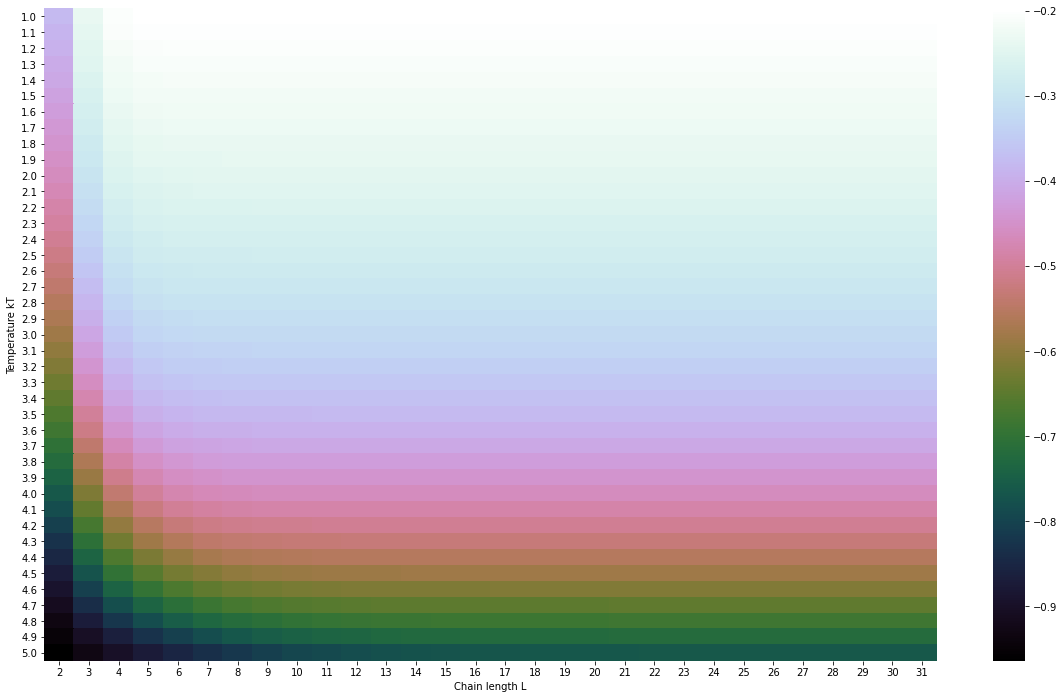

In [5]:
N = 31
plt.figure(figsize=(20, 12))
sns.heatmap(np.rot90(calculation(molecules = N), k = 1), xticklabels=range(2, N + 1), 
            yticklabels=np.arange(1, 5.01, 0.1).round(2), cmap='cubehelix')
plt.xlabel('Chain length L')
plt.ylabel('Temperature kT')
plt.show()